In [94]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from sodapy import Socrata


Pulling the COPA police complaints data set by complainant. Using the Socrata API through the Chicago Open Data Portal

In [134]:
client = Socrata("data.cityofchicago.org", 'EjrjYzG6YAkBx7bPBzME8jD4c')
results = client.get("w3hi-cfa4",limit = 500000)

complaints = pd.DataFrame.from_records(results)
complaints


,age_of_complainant,assignment,beat,case_type,complaint_date,complaint_day,complaint_hour,complaint_month,current_category,current_status,finding_code,log_no,police_shooting,race_of_complainant,sex_of_complainant
0,20-29,IPRA,131,Complaint,2017-08-23T15:09:11.000,4,15,8,Excessive Force,Closed,NO AFFIDAVIT,1086449,No,African American / Black,Male
1,50-59,IPRA,1821,Complaint,2008-11-09T16:55:27.000,1,16,11,Verbal Abuse,Closed,NO AFFIDAVIT,1021567,No,African American / Black,Female
2,20-29,IPRA,712,Notification,2009-12-07T19:18:01.000,2,19,12,OC Discharge,Closed,No Finding,1032357,No,African American / Black,Male
3,NaN,IPRA,1613,Notification,2014-07-09T15:08:16.000,4,15,7,Firearm Discharge at Animal,Closed,No Finding,1070242,No,NaN,NaN
4,50-59,IPRA,726,Complaint,2011-07-12T20:49:37.000,3,20,7,Excessive Force,Closed,NO AFFIDAVIT,1046883,No,African American / Black,Male
5,30-39,IPRA,621,Complaint,2016-09-28T08:54:49.000,4,8,9,Miscellaneous,Closed,No Finding,1082433,No,African American / Black,Male
6,NaN,IPRA,1122,Notification,2012-06-30T23:54:24.000,7,23,6,Firearm Discharge at Animal,Closed,No Finding,1055175,No,NaN,NaN
7,20-29,IPRA,726,Complaint,2010-07-24T16:05:07.000,7,16,7,Unnecessary Display of Weapon,Closed,NOT SUSTAINED,1038330,No,African American / Black,Female
8,30-39,IPRA,1622,Complaint,2014-12-21T05:34:31.000,1,5,12,Domestic Violence,Closed,SUSTAINED,1073055,No,Hispanic,Female
9,50-59,IPRA,1822,Complaint,2016-11-19T16:19:03.000,7,16,11,Miscellaneous,Closed,SUSTAINED,1083063,No,Hispanic,Male


In [132]:
#Extracting Year from the datetime of the complaint
complaints.complaint_date
complaints['complaint_date'] =  pd.to_datetime(complaints['complaint_date'], format='%Y%m%dT%H:%M:%S.%f')
complaints['complaint_year'] = complaints.complaint_date.dt.year
complaints['complaint_year'].value_counts()

2009    10837
2010    10334
2008    10290
2011     9204
2012     8702
2013     7910
2014     6579
2015     5623
2016     4891
2017     4456
2007     3220
2018      256
Name: complaint_year, dtype: int64

When looking at which complaints are most numerous, Excessive Force and Taser Notification are the highest counts. 

In [136]:
complaints['current_category'].value_counts()

Excessive Force                  10645
Taser Notification                4862
Miscellaneous                     3515
Verbal Abuse                      1783
Unnecessary Display of Weapon     1720
Civil Suits                        737
Firearm Discharge at Animal        717
Domestic Violence                  664
Firearm Discharge - Hits           513
OC Discharge                       482
Firearm Discharge - No Hits        406
Death or Injury In Custody         389
Search or Seizure                  204
Coercion                           160
Taser Discharge                    137
Operational Violation              109
Motor Vehicle Related Death         54
Legal Violation                     24
Bias                                 8
Unlawful Denial of Counsel           2
Name: current_category, dtype: int64

Next I wanted to look at the racial distribution of complaints and found that it was disproportionately African American / Black

In [137]:
complaints['race_of_complainant'].value_counts()

African American / Black             18362
Hispanic                              3747
White                                 2700
Unknown                                745
Asian or Pacific Islander              147
American Indian or Alaskan Native       26
Name: race_of_complainant, dtype: int64

The gender breakdown is also disproportionately Male

In [138]:
complaints['sex_of_complainant'].value_counts()

Male       18483
Female      7013
Unknown      231
Name: sex_of_complainant, dtype: int64

Here I was looking to see if there were some beats with more complaints. This is where I noticed that the beats were listed with their District and their Sector (last two digits). This also revealed this files combines multiple Beats if there multiple beats complained about

In [139]:
complaints['beat'].value_counts()

1134                  363
621                   314
2515                  301
624                   298
3100                  295
713                   294
531                   279
0                     252
1112                  247
823                   225
1011                  222
423                   221
1533                  213
321                   211
512                   210
511                   200
421                   198
1121                  197
811                   191
1122                  189
2211                  187
1531                  185
1513                  183
712                   183
612                   179
725                   178
1024                  177
735                   174
1522                  173
523                   169
                     ... 
1012 | 1014             1
314 | 321               1
1112 | 1533             1
1913 | 1134             1
232 | 231               1
1822 | 1831             1
131 | 132               1
323 | 324   

Looking at just the District we see there are certain districts that have more offenses, but no district is outstanding.

In [149]:
complaints['beat'].str[:-2].value_counts()

11                  2251
7                   2102
6                   1903
8                   1812
4                   1553
5                   1446
25                  1405
15                  1394
3                   1325
10                  1299
9                   1239
22                   958
18                   815
2                    804
16                   739
1                    609
14                   605
24                   592
19                   567
12                   523
17                   440
31                   295
13                   266
20                   266
                     252
23                   230
21                   184
41                    38
1134 | 11             36
621 | 6               34
                    ... 
1713 | 1722 | 19       1
1822 | 6               1
1312 | 13              1
111 | 131 | 1          1
1431 | 14              1
2515 | 14              1
1333 | 13              1
0 | 21                 1
2124 | 21              1


I pulled the dataset broken out by offending officer to see if there is improved beat information

In [144]:
results2 = client.get("wgde-k5wx", limit=500000)
officers = pd.DataFrame.from_records(results)
officers



,age_of_complainant,assignment,beat,case_type,complaint_date,complaint_day,complaint_hour,complaint_month,current_category,current_status,finding_code,log_no,police_shooting,race_of_complainant,sex_of_complainant
0,20-29,IPRA,131,Complaint,2017-08-23T15:09:11.000,4,15,8,Excessive Force,Closed,NO AFFIDAVIT,1086449,No,African American / Black,Male
1,50-59,IPRA,1821,Complaint,2008-11-09T16:55:27.000,1,16,11,Verbal Abuse,Closed,NO AFFIDAVIT,1021567,No,African American / Black,Female
2,20-29,IPRA,712,Notification,2009-12-07T19:18:01.000,2,19,12,OC Discharge,Closed,No Finding,1032357,No,African American / Black,Male
3,NaN,IPRA,1613,Notification,2014-07-09T15:08:16.000,4,15,7,Firearm Discharge at Animal,Closed,No Finding,1070242,No,NaN,NaN
4,50-59,IPRA,726,Complaint,2011-07-12T20:49:37.000,3,20,7,Excessive Force,Closed,NO AFFIDAVIT,1046883,No,African American / Black,Male
5,30-39,IPRA,621,Complaint,2016-09-28T08:54:49.000,4,8,9,Miscellaneous,Closed,No Finding,1082433,No,African American / Black,Male
6,NaN,IPRA,1122,Notification,2012-06-30T23:54:24.000,7,23,6,Firearm Discharge at Animal,Closed,No Finding,1055175,No,NaN,NaN
7,20-29,IPRA,726,Complaint,2010-07-24T16:05:07.000,7,16,7,Unnecessary Display of Weapon,Closed,NOT SUSTAINED,1038330,No,African American / Black,Female
8,30-39,IPRA,1622,Complaint,2014-12-21T05:34:31.000,1,5,12,Domestic Violence,Closed,SUSTAINED,1073055,No,Hispanic,Female
9,50-59,IPRA,1822,Complaint,2016-11-19T16:19:03.000,7,16,11,Miscellaneous,Closed,SUSTAINED,1083063,No,Hispanic,Male


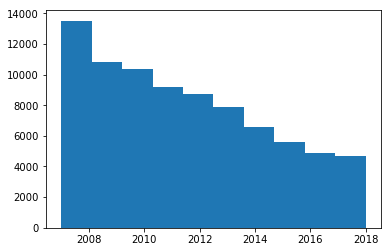

2009    10837
2010    10334
2008    10290
2011     9204
2012     8702
2013     7910
2014     6579
2015     5623
2016     4891
2017     4456
2007     3220
2018      256
Name: complaint_year, dtype: int64

In [146]:
officers['complaint_date'] =  pd.to_datetime(officers['complaint_date'], format='%Y%m%dT%H:%M:%S.%f')
officers['complaint_year'] = officers.complaint_date.dt.year
plt.hist(officers['complaint_year'])
plt.show()
officers['complaint_year'].value_counts()

The officer file also has multiple beats combined together. So for the analysis I will have to separate them

In [148]:
officers.beat.str[:-2].value_counts()

11                  2251
7                   2102
6                   1903
8                   1812
4                   1553
5                   1446
25                  1405
15                  1394
3                   1325
10                  1299
9                   1239
22                   958
18                   815
2                    804
16                   739
1                    609
14                   605
24                   592
19                   567
12                   523
17                   440
31                   295
13                   266
20                   266
                     252
23                   230
21                   184
41                    38
1134 | 11             36
621 | 6               34
                    ... 
1713 | 1722 | 19       1
1822 | 6               1
1312 | 13              1
111 | 131 | 1          1
1431 | 14              1
2515 | 14              1
1333 | 13              1
0 | 21                 1
2124 | 21              1


This is code to split the rows with multiple beats into multiple rows with the same information but with split up beats

In [160]:
complaints2 = complaints
s = complaints2['beat'].str.split('|').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'beat'
del complaints2['beat']
s
complaints2.join(s, how ="right")

KeyError: 'beat'

In [57]:
#test code for complaints
complaints = pd.DataFrame.from_dict(json_normalize(police), orient='columns')
complaints.race_of_complainants.str.count('African').sum()

657.0